In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
import os
import pandas as pd
import glob
import random

In [ ]:
#빈 캔버스 만들기
def init() : 
  blank = np.zeros([512,512],dtype=np.uint8)
  blank.fill(255)
  blank = cv2.resize(blank,(512,512))
  
  return blank

In [ ]:
def drawNp(img):
  blank = init()
  #print(img.shape[0])
  for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
      if img[i][j] == 1 :
        blank[i][j] = 0

  return blank

In [ ]:
def coorMaxMin(file):
  minX, minY = (file.loc[0][0],file.loc[0][1])
  maxX, maxY = (file.loc[0][0],file.loc[0][1])
  for i in range(0,file.shape[0]):
    x = file.loc[i][0]
    y = file.loc[i][1]
    if x > maxX :
      maxX = x
    if x < minX :
      minX = x
    if y > maxY :
      maxY = y
    if y < minY :
      minY = y

  return minX, minY, maxX, maxY

In [ ]:
def map2Image(minX,minY,maxX,maxY,csv_file):

  inputImage = np.zeros([512,512], dtype=np.uint8)

  for i in range(0,csv_file.shape[0]):
    x = csv_file.loc[i][0]
    y = csv_file.loc[i][1]

    mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
    mapY = int(round(np.interp(y,[minY,maxY],[0,500])))
    inputImage[mapX][mapY] = 1

  outputImage = drawNp(inputImage)

  rotImage = np.rot90(outputImage)

  return rotImage

In [28]:
def map2Image_noise(minX,minY,maxX,maxY,csv_file,fileName):

  inputImage = np.zeros([512,512], dtype=np.uint8)

  randomList = set()
  while len(randomList) < int(csv_file.shape[0]/7):
    randomList.add(random.randint(0,csv_file.shape[0]))
  print(fileName)
  newName = fileName+"_noise.csv"
  print(newName)

  data = {"lat":[],"long":[],"num":[],"Noise":[]}

  randomList=list(randomList)
  dicisionList = [1,-1]
  for i in range(0,csv_file.shape[0]):

    try:
      randomList.index(i)
      
      r = random.uniform((minX-maxX)/40,(minX-maxX)/20)
      D = random.choice(dicisionList)

      x = csv_file.loc[i][0]-(D*r)
      y = csv_file.loc[i][1]-(D*r)

      mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
      mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
      inputImage[mapX][mapY] = 1
      data["lat"].append(x)
      data["long"].append(y)
      data["num"].append(i)
      data["Noise"].append(True)

    except:
      x = csv_file.loc[i][0]
      y = csv_file.loc[i][1]

      mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
      mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
      inputImage[mapX][mapY] = 1
      data["lat"].append(x)
      data["long"].append(y)
      data["num"].append(i)
      data["Noise"].append(False)


  outputImage = drawNp(inputImage)

  rotImage = np.rot90(outputImage)
  print(data)

  dataFrame = pd.DataFrame(data)

  print(dataFrame)

  dataFrame.to_csv(newName,index=False)

  return rotImage

In [ ]:
os.chdir("/content/drive/My Drive/WayPoint/직접찍은데이터/")
#os.chdir("/content/drive/My Drive/WayPoint/201607/")

files = glob.glob("*csv")

for myFile in files:
  csv_file = pd.read_csv(myFile, names=["lat","long","num"], header=None)
  
  minX, minY, maxX, maxY = coorMaxMin(csv_file)
  print(minX-maxX)
  resultImage = map2Image_noise(minX,minY,maxX,maxY,csv_file,myFile[:-4])

  cv2_imshow(resultImage)




512


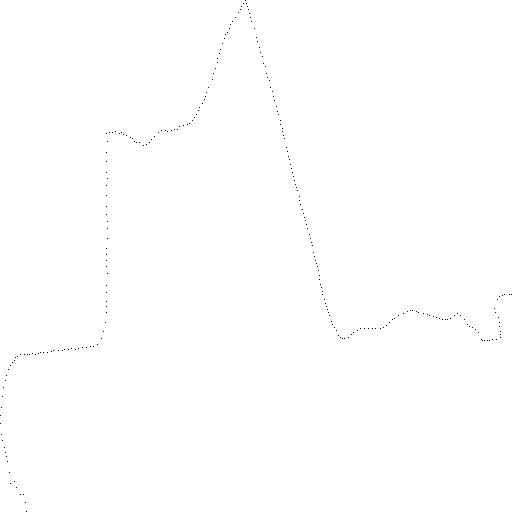

In [ ]:
resultImage = map2Image(minX,minY,maxX,maxY,csv_file)

cv2_imshow(resultImage)
